In [1]:
from __future__ import division
import numpy as np
import matplotlib.pylab as plt

The demos for this week look at the Euler integration method of solving Ordinary Differential Equations. 

#### Lecture 5.7 and 5.8 demo_eulerIntegration_reversion2Mean: Integration of ODE with reversion to the mean

In [2]:
def eulerIntegration(t0, f0, a, T, N):
    """
    Integration of an ODE with the Euler scheme

    INPUT:
        t0 : Initial time
        f0 : Initial value of the function f(t0) = f0; 
        a  : Handle of the function a(t,f), which gives the value
             of the derivative 
        T  : Length of integration interval [t0, t0+T]
        N  : Number of time steps

    OUTPUT:
        t  : Times at which the trajectory is monitored
        f  : Values of the trajectory that starts from f(t0) = f0
    """
    # size of the integration step
    deltaT = T/N;              
    
    # monitoring times
    t = np.linspace(t0, t0+T, N+1)
    # initialize trajectory
    f = np.zeros((N+1,))
    
    ### Euler integration method
    # initial condition
    f[0] = f0
    
    # sum over steps to approximate the solution
    for n in range(N):
        f[n+1] = f[n] + a(t[n], f[n]) * deltaT
    # Note that for-loops over large arrays can be a source of poor performance.
    # It can be optimized in a number of ways, e.g. through packages
    # such as Cython, PyPy, f2py (fortran) or Numba (to name but a few)
        
    return t, f

Example: reversion to the mean. This process is described by the following ODE:
$d\sigma(t) = - \alpha (\sigma(t) - \sigma_\infty) dt  $

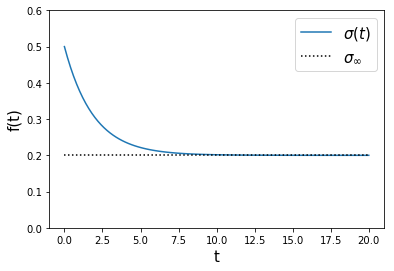

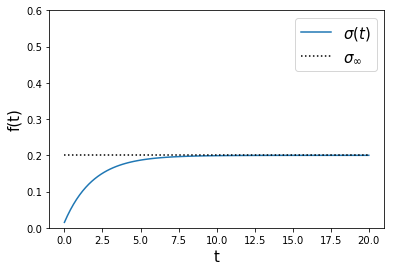

In [3]:
def meanReversion(sigma_0):
    sigma_infty, alpha = .2, .5
    
    def a(t, sigma):
        return -alpha * (sigma - sigma_infty)
    
    t0, T, N = (0, 20, 100)
    
    t, sigma = eulerIntegration(t0, sigma_0, a, T, N)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(t, sigma, label='$\sigma(t)$')
    ax.plot([t[0], t[-1]], [sigma_infty, sigma_infty], 'k:', label='$\sigma_{\infty}$')
    ax.set_ybound(0,.6)
    ax.set_xlabel('t', fontsize=15)
    ax.set_ylabel('f(t)', fontsize=15)
    ax.legend(fontsize=15)
    plt.show()
    

meanReversion(.5)
meanReversion(.015)

#### demo_eulerIntegration_exponential: Integration of ODE for the exponential;  demo_eulerIntegration_bankAccount: demo Euler integration scheme for exponential

Example: growth of deposited money $M$ on a bank account with interest $r$. The ODE describing the deposit as a function of time is given by:
$dM_t = r M_t dt$. We approximate the solution using the Euler Integration Method and compare this to the true solution.

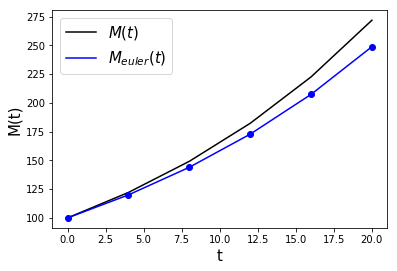

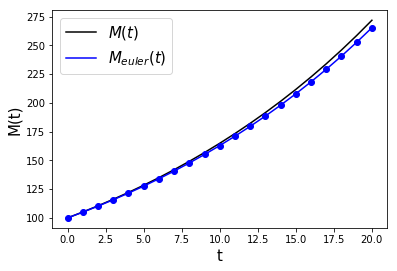

In [4]:
def bankAccount(N, T):
   
    t0 = 0
    M0, r = (100, .05)
    
    def growth(t, M):
        return r * M

    t, M_euler = eulerIntegration(t0, M0, growth, T, N)
    M = M0 * np.exp(r * t)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(t, M, 'k', label = '$M(t)$')
    ax.plot(t, M_euler, 'b', label = '$M_{euler}(t)$')
    ax.plot(t, M_euler, 'bo', linewidth=2)
    ax.set_xlabel('t', fontsize=15)
    ax.set_ylabel('M(t)', fontsize=15)
    ax.legend(fontsize=15, loc='upper left')
    plt.show()
    

bankAccount(N=5, T=20)
# Increasing N or decreasing T will decrease the error between M and the approximation M_euler.
bankAccount(N=20, T=20)

#### Lecture 5.9 -- eulerIntegrationVariableGrid.m

At each step the Euler integration method makes use of the interval size of consecutive time stamps $\Delta T = t_n - t_{n-1}$. So far we have assumed that these time stamps are equally seperated, i.e. $\Delta T$ is constant. But this is not a requirement for the Euler integration method.

We can implement a new Euler integration scheme which makes use of a variable grid size of time stamps.

In [5]:
def eulerIntegrationVariableGrid(f0, a, t):
    """
    eulerIntegrationVariableGrid: Integration of an ODE with the Euler scheme
    
    INPUT:
        f0   : Initial value of the function
        a    : Handle of the function a(t,f), which gives the value
               of the derivative 
        t    : Times at which the trajectory is monitored

    OUTPUT:
        f    : Values of the trajectory that starts from 
               f(1) = f0 at t(1) = t0
    """
    # length of the different time intervals
    deltaT = np.diff(t)
    
    # reserve memory for the trajectory
    f = np.zeros_like(t)
    
    #  initial value of trajectory
    f[0] = f0
    for n in range(deltaT.size):
       f[n+1] = f[n] + a(t[n], f[n]) * deltaT[n]
    return f


We revisit the previous example, but consider a non-equally spaced time array `t`. 

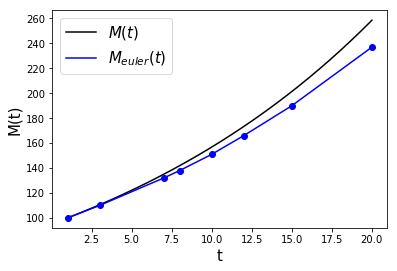

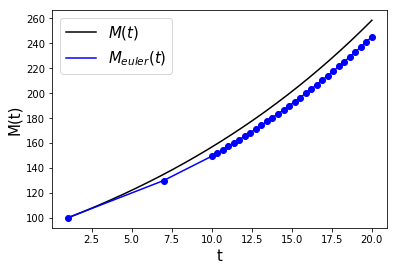

In [8]:
def eulerIntegrationBankAccountExample(t):
    M0, r = (100, .05)
    def a(t, M):
        return r * M
    M_euler = eulerIntegrationVariableGrid(M0,a,t)
    nPlot = 1000
    tPlot = np.linspace(t[0], t[-1], nPlot)
    M = M0 * np.exp(r * (tPlot - t[0]))
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(tPlot, M, 'k', label = '$M(t)$')
    ax.plot(t, M_euler, 'b', label = '$M_{euler}(t)$')
    ax.plot(t, M_euler, 'bo', linewidth=2)
    ax.set_xlabel('t', fontsize=15)
    ax.set_ylabel('M(t)', fontsize=15)
    ax.legend(fontsize=15, loc='upper left')
    
# Example 1
eulerIntegrationBankAccountExample(t = np.array([1, 3, 7, 8, 10, 12, 15, 20]))
# Example 2
eulerIntegrationBankAccountExample(t = np.r_[[1, 7], np.linspace(10, 20, 30)])
plt.show()

#### Lecture 5.10: eulerIntegrationVanDerPol.m

The Van Der Pol oscillator is an example of a non-linear, second order equation. We cannot apply Euler's method directly, since the system is second order. However, the system can be rewritten as a system of coupled first order equations, to which Euler's method can be applied in a consecutive fashion. This is done in `eulerIntegrationVanDerPol`

In [9]:
def eulerIntegrationVanDerPol(t0, x0, p0, mu, T, N):
    """
    Van Der Pol oscillator solved via Euler integration
    INPUT:
        t0 : Initial time
        x0 : Initial position 
        p0 : Initial momentum 
        mu : damping strength
        T  : Length of integration interval [t0, t0+T]
        N  : Number of time steps

    OUTPUT:
        t  : Times at which the trajectory is monitored
             t(n) = t0 + n Delta T
        x  : Values of the position along the trajectory
        p  : Values of the momentum along the trajectory

    """
    # Size of integration step
    deltaT = T/N
    
    # initialize monitoring times
    t = np.linspace(t0, t0 + T, N + 1)
    
    # intialize x and p
    x = np.zeros_like(t)
    p = np.zeros_like(t)
    
    ## Euler integration 
    # initial conditions
    x[0] = x0
    p[0] = p0
    for n in np.arange(N):
        x[n+1] = x[n] + p[n] * deltaT
        p[n+1] = p[n] + (mu * (1 - x[n] * x[n]) * p[n] - x[n]) * deltaT

    return t, x, p

We plot the time series of the position and momentum, and the corresponding phase space plots, for two values of the damping parameter.

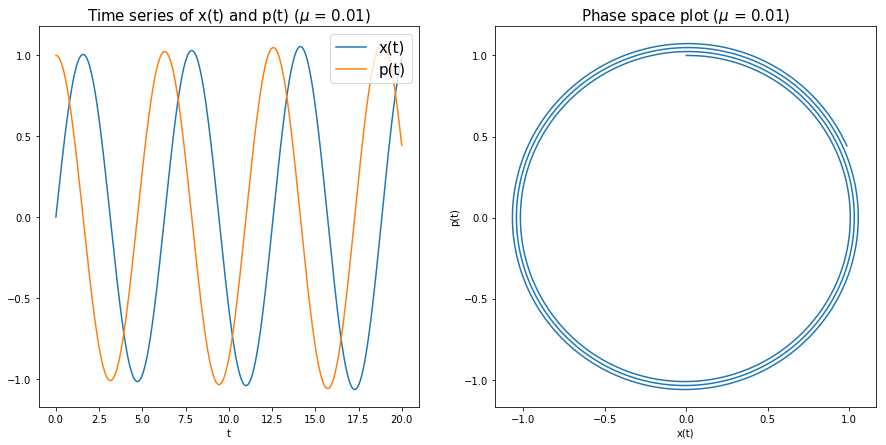

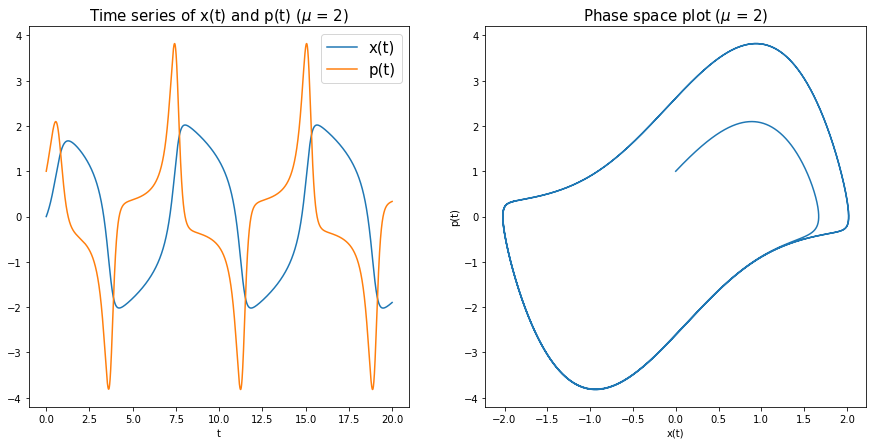

In [11]:
def vanDerPolExample(mu, x0, p0):
    t0, T, N = 0, 20, 100000
    t, x, p = eulerIntegrationVanDerPol(t0, x0, p0, mu, T, N)
    fig = plt.figure(figsize=(15, 7))
    ax = fig.add_subplot(121)
    ax.plot(t, x, label='x(t)')
    ax.plot(t, p, label='p(t)')
    ax.set_title('Time series of x(t) and p(t) ($\mu$ = {})'.format(mu), fontsize=15)
    ax.set_xlabel('t')
    ax.legend(fontsize=15, loc='upper right')
    ax2 = fig.add_subplot(122)
    ax2.plot(x, p)
    ax2.set_title('Phase space plot ($\mu$ = {})'.format(mu), fontsize=15)
    ax2.set_xlabel('x(t)')
    ax2.set_ylabel('p(t)')
    plt.show()

# The behavior of the system is sensitive to the damping mu of the system
vanDerPolExample(mu=.01, x0=0, p0=1)
vanDerPolExample(mu=2, x0=0, p0=1)
plt.show()

Finally, this can be turned into a fancy animation. Unfortunately I could not get it to work on my computer -- there is apparently a problem with the backend. But supposedly the following code works (you might need to run it directly from the command line)

The file `van_der_pol_demo.py`  can be found in the github repository. Credit goes to chanGimeno for this implementation.

In [12]:
%run van_der_pol_demo.py 